<a href="https://colab.research.google.com/github/arghac14/tmdb-DataAnalysis/blob/master/tmdbDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving tmdb_5000_movies.csv to tmdb_5000_movies (1).csv


In [0]:
import io
df = pd.read_csv(io.StringIO(uploaded['tmdb_5000_movies.csv'].decode('utf-8')))
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [0]:
df.dropna()
len(df)

4803

In [0]:
df1=df.sort_values('vote_average',ascending=False)
df2=df1[['original_title','vote_average']].head(5)
df2.index=[1,2,3,4,5]
print("Top 5 highest rated movies-")
df2

Top 5 highest rated movies-


,original_title,vote_average
1,Stiff Upper Lips,10.0
2,Me You and Five Bucks,10.0
3,"Dancer, Texas Pop. 81",10.0
4,Little Big Top,10.0
5,Sardaarji,9.5


In [0]:
df1=df.sort_values('popularity',ascending=False)
df2=df1[['original_title','popularity']].head(5)
df2.index=[1,2,3,4,5]
print("Top 5 most popular movies-")
df2

Top 5 most popular movies-


,original_title,popularity
1,Minions,875.581305
2,Interstellar,724.247784
3,Deadpool,514.569956
4,Guardians of the Galaxy,481.098624
5,Mad Max: Fury Road,434.278564


In [0]:
df1=df.sort_values('budget',ascending=False)
df2=df1[['original_title','budget']].head(5)
df2.index=[1,2,3,4,5]
print("Top 5 movies with highest budget-")
df2

Top 5 movies with highest budget-


,original_title,budget
1,Pirates of the Caribbean: On Stranger Tides,380000000
2,Pirates of the Caribbean: At World's End,300000000
3,Avengers: Age of Ultron,280000000
4,Superman Returns,270000000
5,John Carter,260000000


In [0]:
print("Average gross of the movies:",float("{0:.2f}".format(df['revenue'].mean())))
print("Average rating of the movies:",float("{0:.2f}".format(df['vote_average'].mean())))
print("Average runtime of the movies:",float("{0:.2f}".format(df['runtime'].mean())))

Average gross of the movies: 82260638.65
Average rating of the movies: 6.09
Average runtime of the movies: 106.88


# Data Visualization

In [0]:
from matplotlib import pyplot as plt
from matplotlib import style

### Popularity of movies over the years

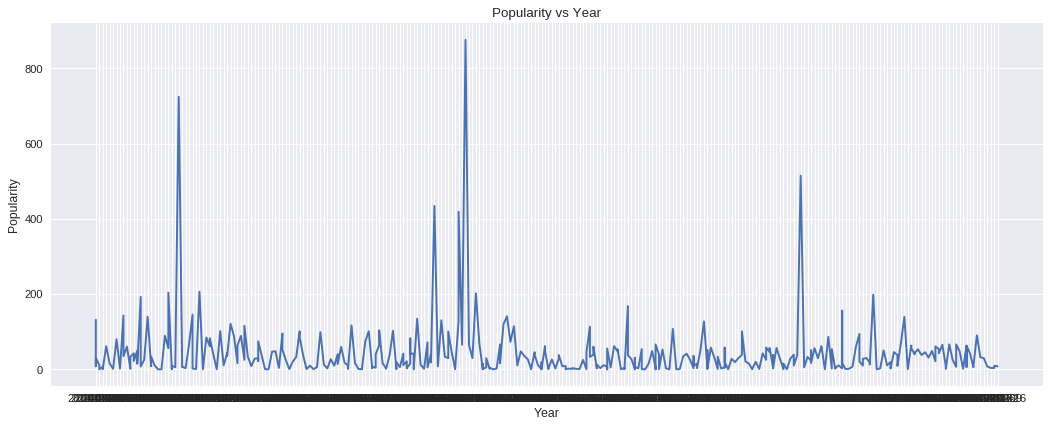

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

df1=df.sort_values('release_date')
x=df1['release_date']
y=df1['popularity']
x=x.fillna(method='ffill')[4400:4800]
y=y.dropna()[4400:4800]

plt.plot(x,y)
plt.title('Popularity vs Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

### Rating pie chart

([<matplotlib.patches.Wedge at 0x7fe145f0fb70>,
 [Text(-0.03965797688753207, 1.0992848788504226, '8.0+'),
  Text(-1.0009244783286544, -0.4562347955631087, '6.0-7.9'),
  Text(1.0167222318548812, 0.41985223978446173, '0-5.9')],
 [Text(-0.021631623756835677, 0.5996099339184122, '1.1%'),
  Text(-0.5459588063610841, -0.2488553430344229, '61.3%'),
  Text(0.5545757628299351, 0.22901031260970636, '37.5%')])

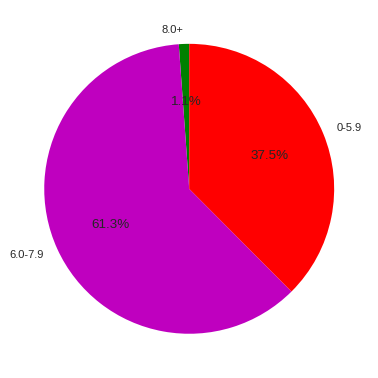

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(36, 6), dpi=80, facecolor='w', edgecolor='k')

x=df['vote_average'][df['vote_average']>8.0]
y=df['vote_average'][df['vote_average']<8.0][df['vote_average']>6.0]
z=df['vote_average'][df['vote_average']<5.9]

slices=[len(x),len(y),len(z)]
activities=['8.0+','6.0-7.9','0-5.9']
colors=['g','m','r']

plt.pie(slices,labels=activities,colors=colors,startangle=90,shadow=False,explode=(0,0.0,0),autopct='%1.1f%%')